# **Heart Disease Prediction**

**I. Importing essential libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


**II. Importing and understanding our dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset.csv


In [ ]:
dataset = pd.read_csv("heart_disease_dataset.csv")
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Shape of dataset**

In [ ]:
dataset.shape

(920, 16)

In [ ]:
# check for duplicate values if any
df_dup=dataset.duplicated().any()
print(df_dup)

False


**Description**

In [ ]:
dataset.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**checking for null values**

In [ ]:
dataset.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


**Handling Missing Values**

In [ ]:
# Numerical columns
dataset['trestbps'] = dataset['trestbps'].fillna(dataset['trestbps'].mean())
dataset['chol'] = dataset['chol'].fillna(dataset['chol'].mean())
dataset['thalch'] = dataset['thalch'].fillna(dataset['thalch'].mean())
dataset['oldpeak'] = dataset['oldpeak'].fillna(dataset['oldpeak'].mean())

# Categorical columns
dataset['fbs'] = dataset['fbs'].fillna(dataset['fbs'].mode()[0])
dataset['restecg'] = dataset['restecg'].fillna(dataset['restecg'].mode()[0])
dataset['exang'] = dataset['exang'].fillna(dataset['exang'].mode()[0])
dataset['slope'] = dataset['slope'].fillna(dataset['slope'].mode()[0])
dataset['ca'] = dataset['ca'].fillna(dataset['ca'].mode()[0])
dataset['thal'] = dataset['thal'].fillna(dataset['thal'].mode()[0])
dataset.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


**Converting Categorical Columns to Numerical Columns.**

Now that we've handled the missing values, let's convert the categorical columns to numerical columns. We'll use the LabelEncoder from the sklearn.preprocessing library to achieve this.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the categorical columns and convert them to numerical columns
for column in categorical_columns:
    dataset[column] = le.fit_transform(dataset[column])

In [ ]:
dataset.sample(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
654,655,56,1,Switzerland,2,155.0,0.0,0,2,99.0,0,0.0,1,0,1,2
753,754,55,1,VA Long Beach,2,0.0,0.0,0,1,155.0,0,1.5,1,0,1,3
445,446,54,0,Hungary,1,120.0,273.0,0,1,150.0,0,1.5,1,0,1,0
629,630,51,1,Switzerland,0,130.0,0.0,0,1,170.0,0,-0.7,2,0,1,2
593,594,54,0,Hungary,2,130.0,294.0,0,2,100.0,1,0.0,1,0,1,1


**Removing the unnecessary columns**

We remove the 'dataset' and 'id' columns because they're not relevant features for modeling or analysis.




In [ ]:
# Drop unnecessary columns
dataset = dataset.drop(['dataset', 'id'], axis=1)

**Getting Familiar with Dataset Columns**

In [ ]:
info = [
    "age",
    "sex (1: male, 0: female)",
    "chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)",
    "resting blood pressure",
    "serum cholestoral in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (values 0,1,2)",
    "maximum heart rate achieved",
    "exercise induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "the slope of the peak exercise ST segment",
    "number of major vessels (0-3) colored by flourosopy",
    "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"
]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			sex (1: male, 0: female)
cp:			chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
trestbps:			resting blood pressure
chol:			serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalch:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**Analysing the 'num' variable**

In [ ]:
dataset["num"].describe()

,num
count,920.000000
mean,0.995652
std,1.142693
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


This suggests that the 'num' column is likely the target variable, which is a classification label with 5 possible values: 0, 1, 2, 3, and 4. The mean value is close to 1, indicating that the majority of the samples are classified as 1. The standard deviation is relatively high, indicating some variability in the data.

In [ ]:
print(dataset.corr()["num"].abs().sort_values(ascending=False))

num         1.000000
oldpeak     0.421907
thalch      0.351055
exang       0.350567
age         0.339596
cp          0.314518
ca          0.261797
sex         0.259342
chol        0.228238
slope       0.201875
thal        0.186387
fbs         0.129539
trestbps    0.116225
restecg     0.034603
Name: num, dtype: float64


The top 5 correlated columns with the target variable 'num' are oldpeak, thalch, exang, age, and cp, while restecg, trestbps, and fbs show the weakest correlation. This insight can inform feature selection and engineering decisions to improve model performance.

# ***Exploratory Data Analysis (EDA)***

**Detecting and handling outliers**

Before we dive into data visualization, let's first identify and remove any outliers to ensure our analysis is based on a robust and representative dataset.

In [ ]:
# Detecting outliers
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset < lower_bound).any(axis=1) | (dataset > upper_bound).any(axis=1)]

print("Number of outliers before handling: ", len(outliers))

# Handling outliers using winsorization (replacing outliers with the nearest bound)
from scipy import stats

dataset_handled = dataset.copy()

for col in dataset.columns:
    Q1_col = dataset[col].quantile(0.25)
    Q3_col = dataset[col].quantile(0.75)
    IQR_col = Q3_col - Q1_col

    lower_bound_col = Q1_col - 1.5 * IQR_col
    upper_bound_col = Q3_col + 1.5 * IQR_col

    dataset_handled.loc[dataset_handled[col] < lower_bound_col, col] = lower_bound_col
    dataset_handled.loc[dataset_handled[col] > upper_bound_col, col] = upper_bound_col

# Detecting outliers after handling
outliers_handled = dataset_handled[(dataset_handled < lower_bound).any(axis=1) | (dataset_handled > upper_bound).any(axis=1)]

print("Number of outliers after handling: ", len(outliers_handled))


Number of outliers before handling:  746
Number of outliers after handling:  0


# 1. Univariate Analysis
Understanding the distribution of individual variables helps in detecting skewness, outliers, and common trends.



**Continuous Variables**

**1.1 Histograms** (Shows the frequency distribution of numerical features.)
python

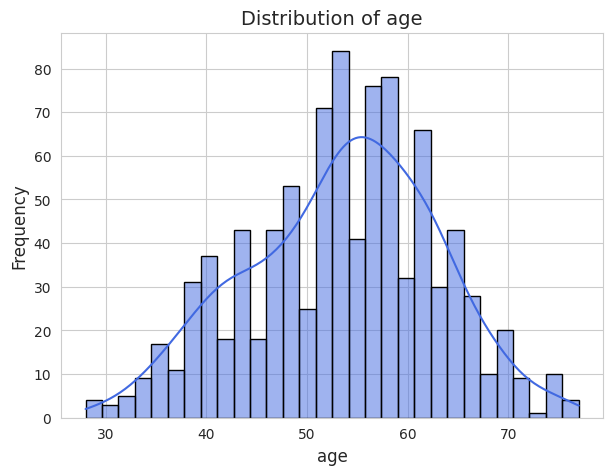

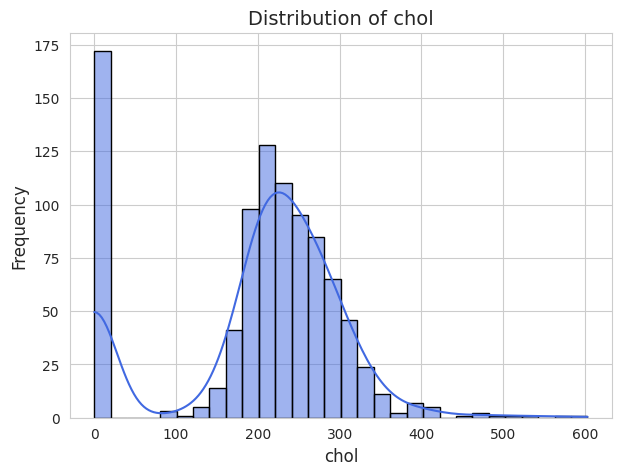

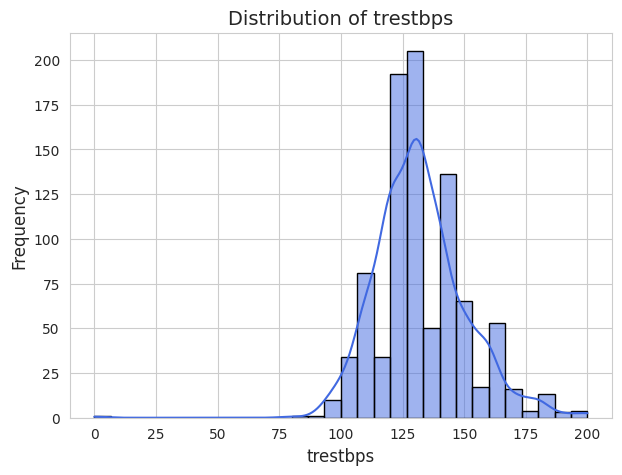

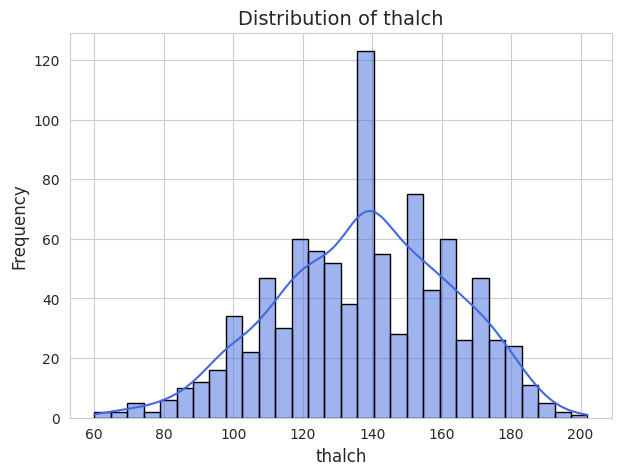

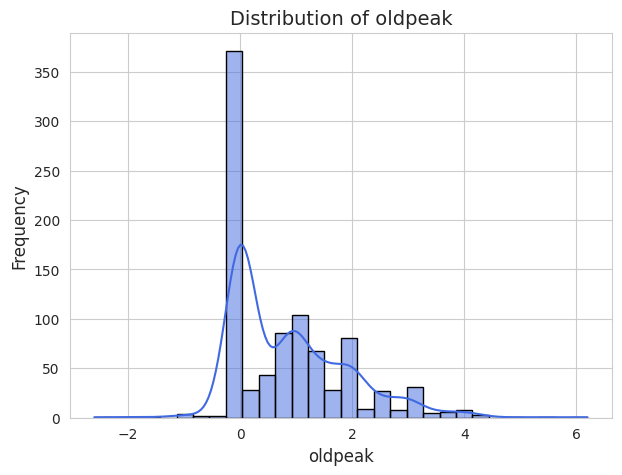

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

continuous_vars = ['age', 'chol', 'trestbps', 'thalch', 'oldpeak']

# Histograms with KDE
for var in continuous_vars:
    plt.figure(figsize=(7, 5))
    sns.histplot(dataset[var], kde=True, bins=30, color='royalblue', edgecolor='black')
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

**1.2 Box Plots** (Helps detect outliers and the spread of numerical data.)

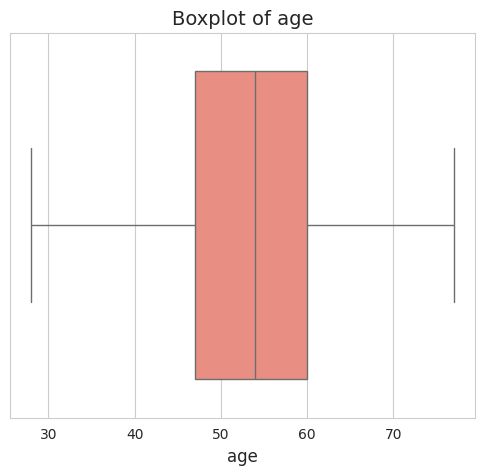

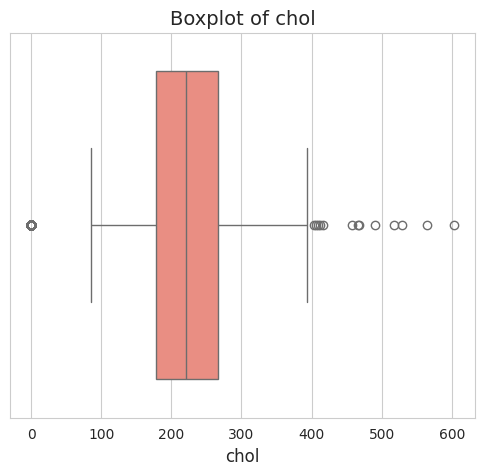

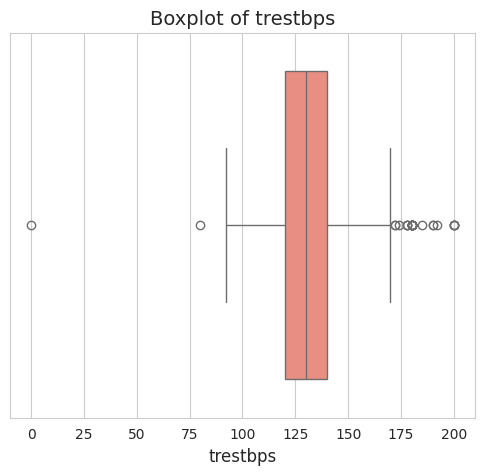

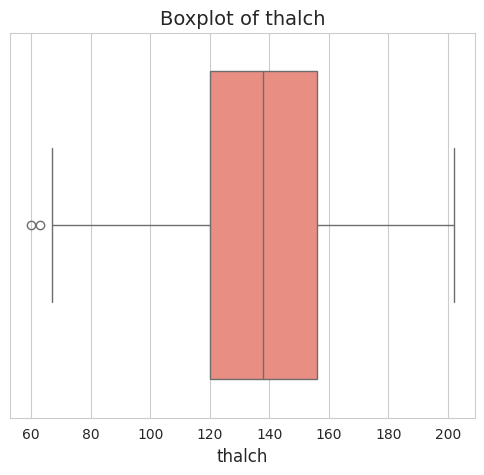

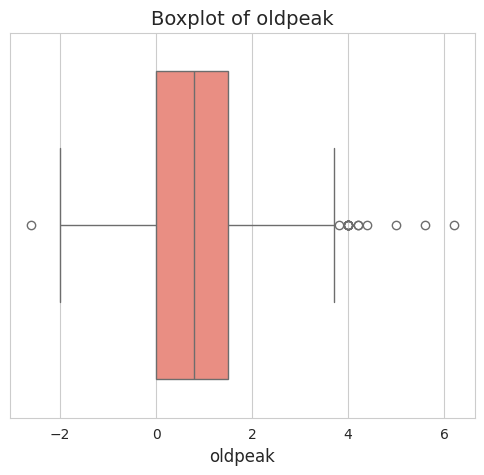

In [ ]:
# Box plots with enhanced aesthetics
for var in continuous_vars:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=dataset[var], color='salmon')
    plt.title(f'Boxplot of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.show()

**1.3 Density Plots (KDE)** (Shows the probability density of a variable.)

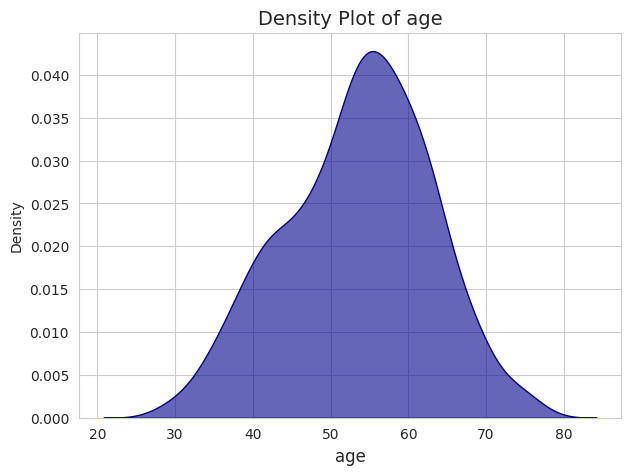

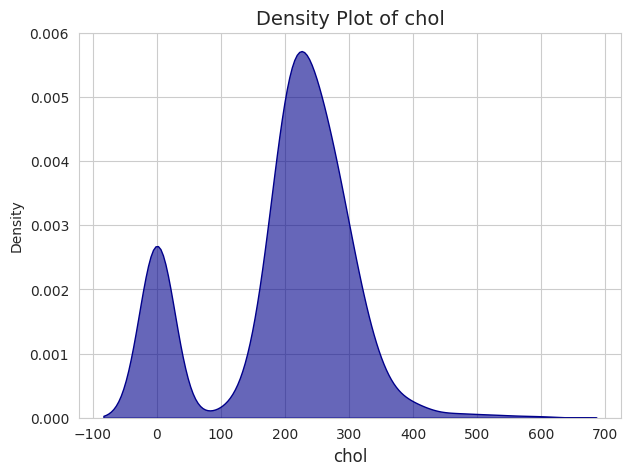

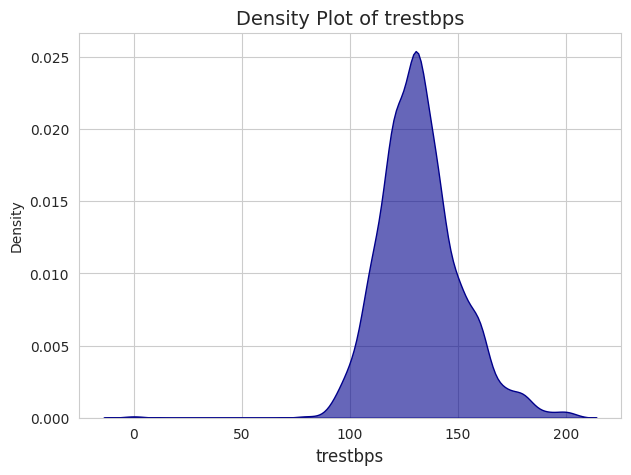

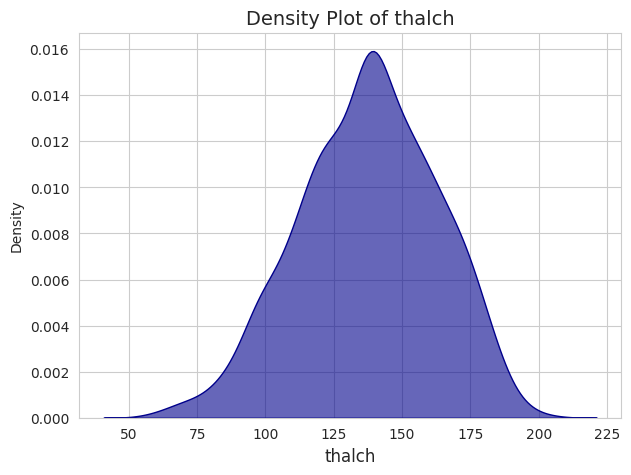

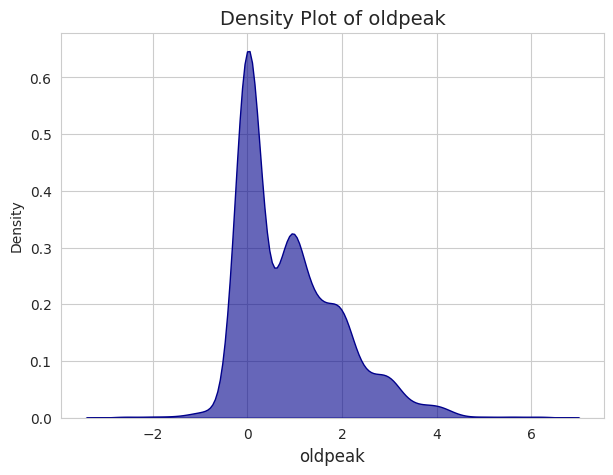

In [ ]:
# KDE Plots
for var in continuous_vars:
    plt.figure(figsize=(7, 5))
    sns.kdeplot(dataset[var], shade=True, color='darkblue', alpha=0.6)
    plt.title(f'Density Plot of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.show()

**Categorical Variables**

**1.4 Bar Charts** (Shows the count of each category in categorical variables.)

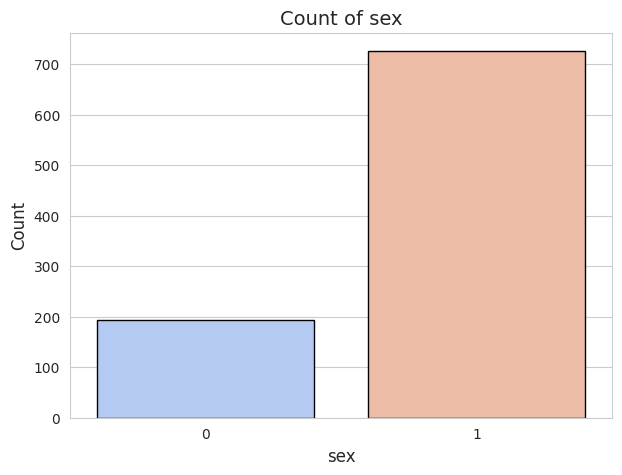

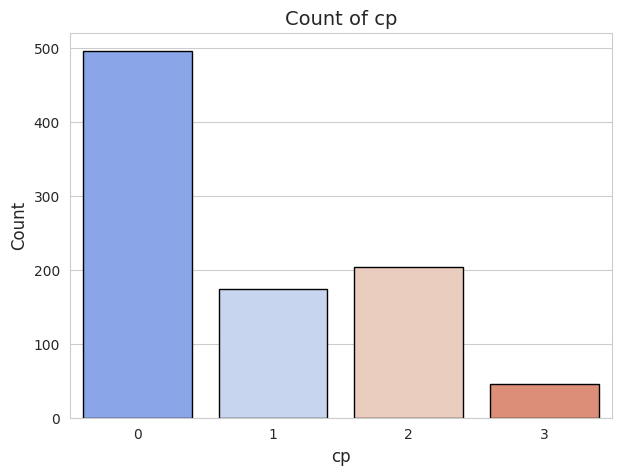

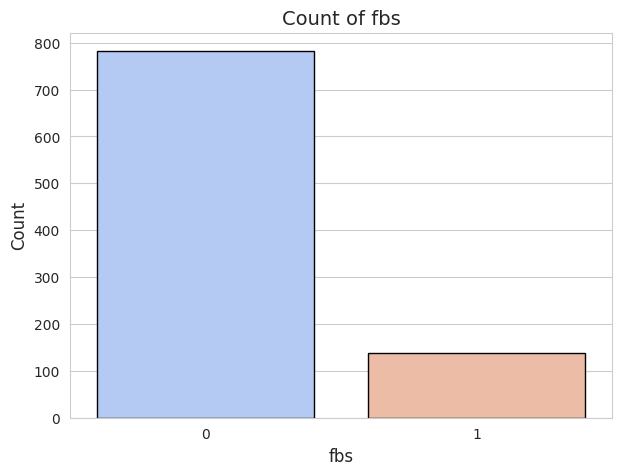

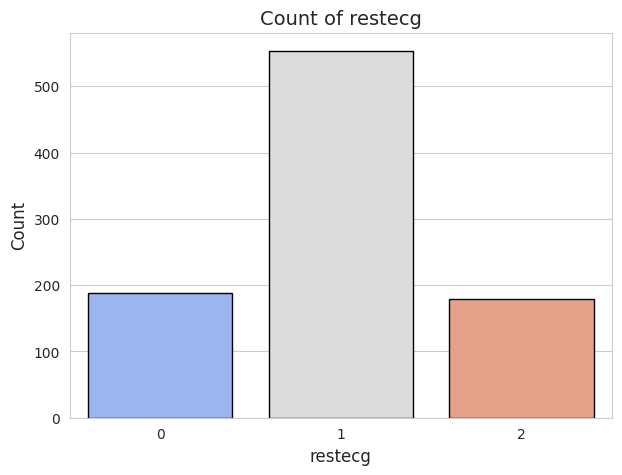

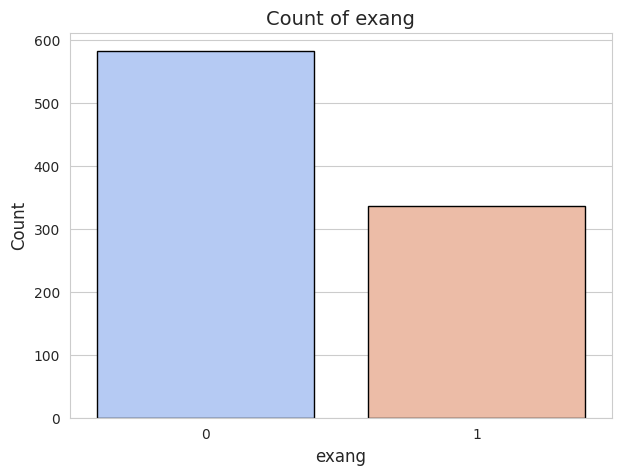

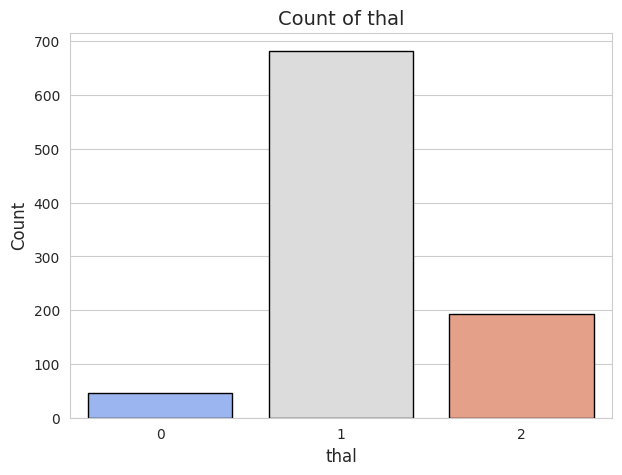

In [ ]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

# Bar charts for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=dataset[var], palette='coolwarm', edgecolor='black')
    plt.title(f'Count of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

**1.5 Pie Charts** (Shows the proportion of each category in categorical variables.)

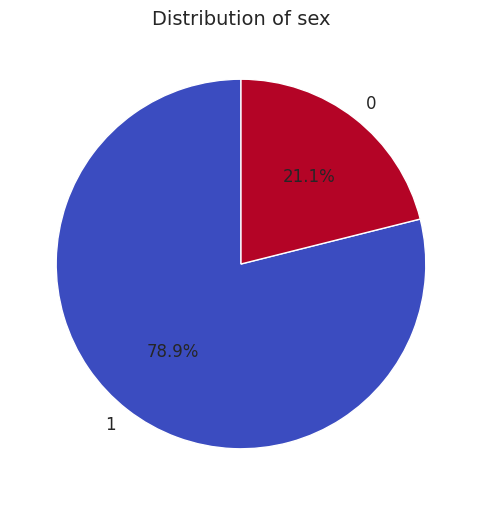

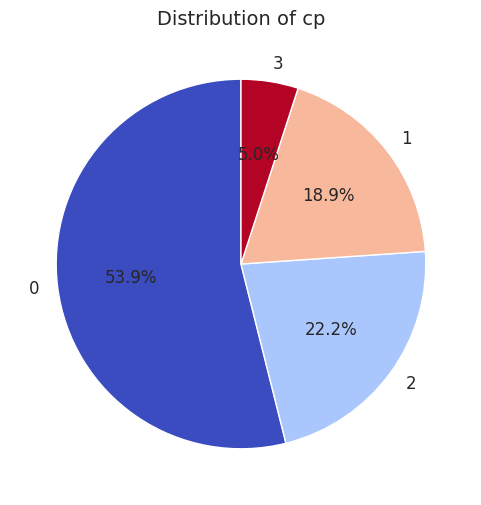

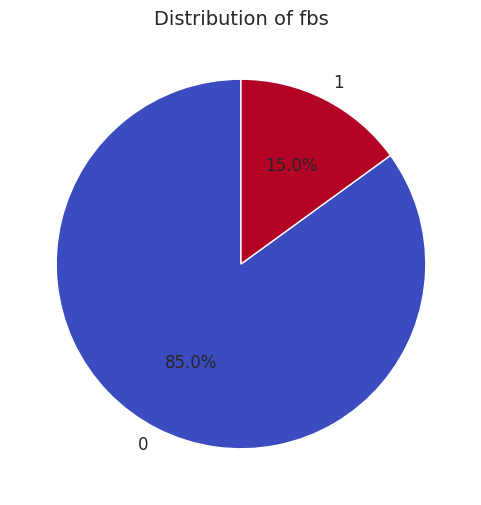

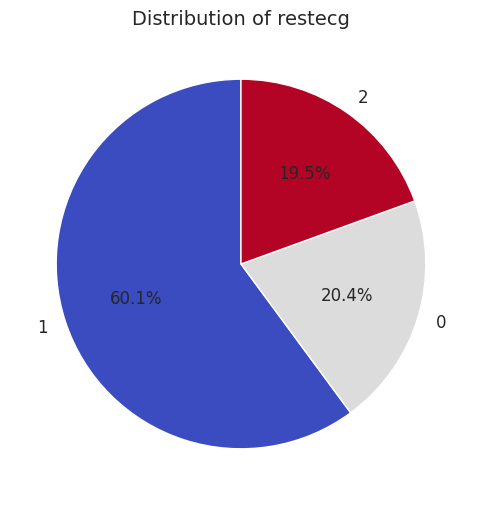

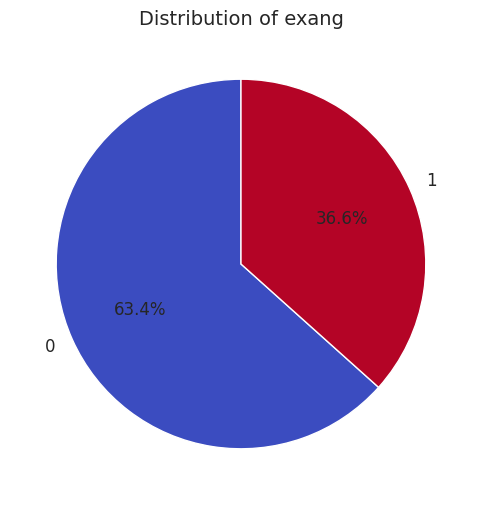

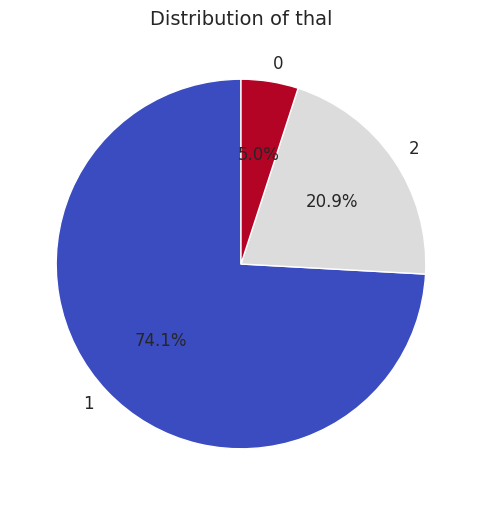

In [ ]:
# Pie charts for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(6, 6))
    dataset[var].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="coolwarm", fontsize=12)
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.ylabel('')
    plt.show()

# 2. Bivariate Analysis
Examining relationships between two variables helps identify correlations and patterns useful for predictions.

**Continuous vs. Continuous**

**2.1 Scatter Plots** (Displays relationships between two numerical features.)

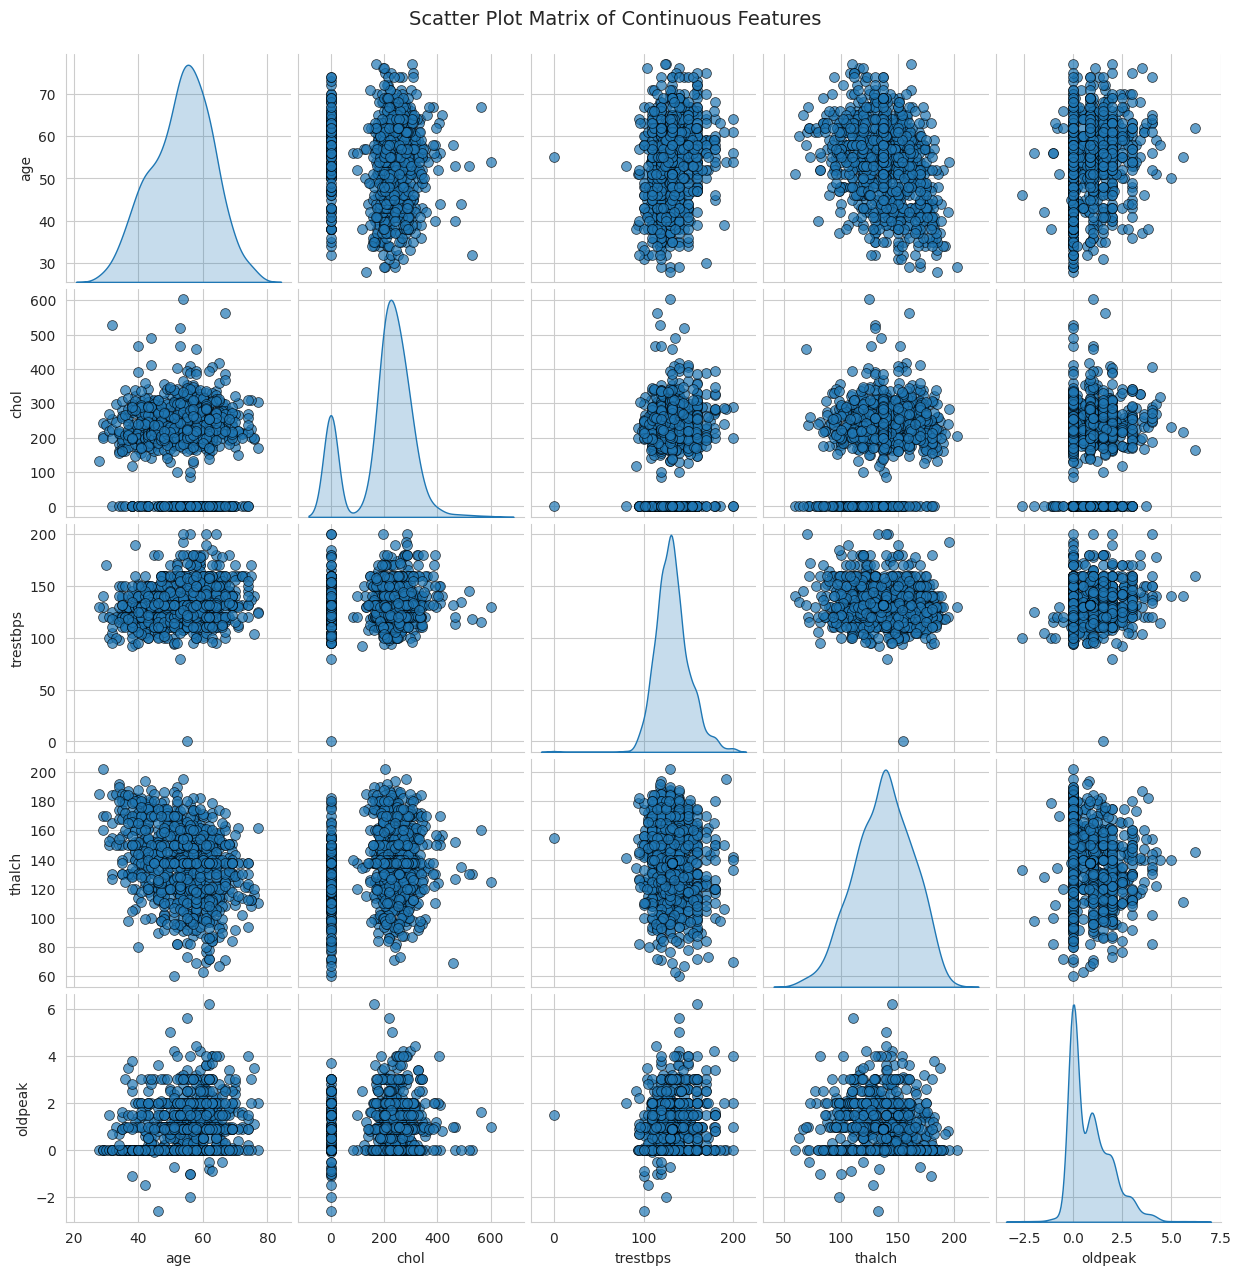

In [ ]:
sns.pairplot(dataset[['age', 'chol', 'trestbps', 'thalch', 'oldpeak']], diag_kind='kde', plot_kws={'alpha':0.7, 's':50, 'edgecolor':'k'})
plt.suptitle('Scatter Plot Matrix of Continuous Features', fontsize=14, y=1.02)
plt.show()

**2.2 Correlation Heatmap** (Shows the correlation between numerical features using colors.)

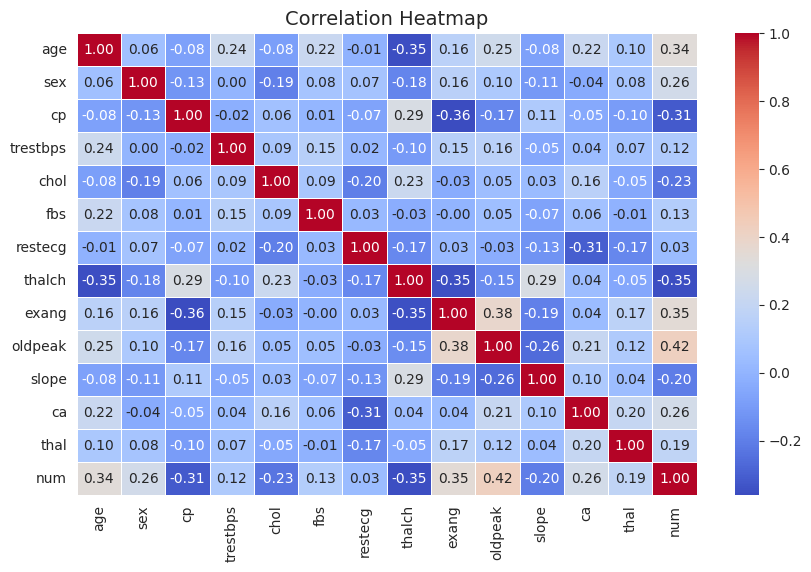

In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

**Continuous vs. Categorical**

**2.3 Box Plots** (Shows how a numerical variable varies across different categorical groups.)

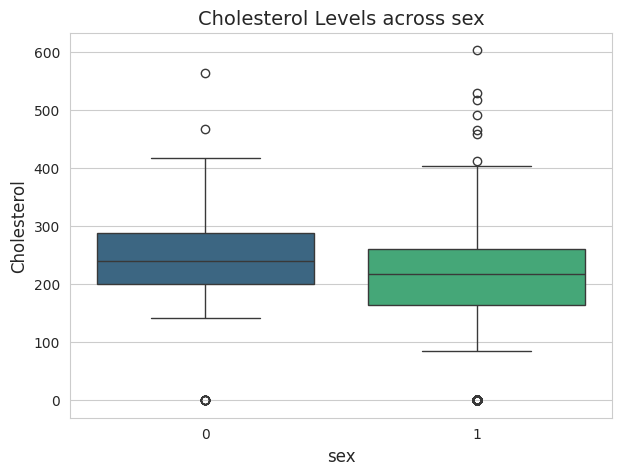

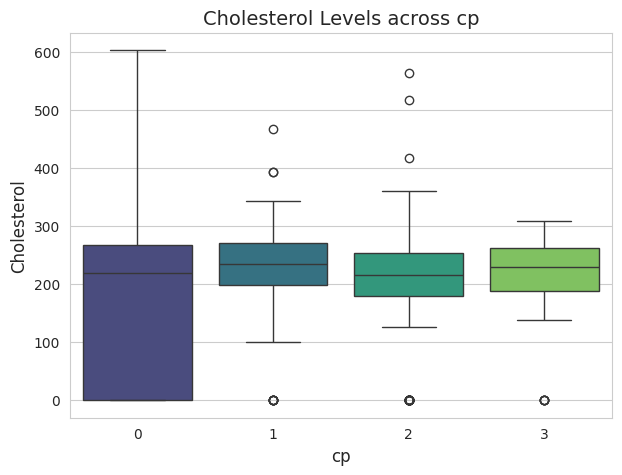

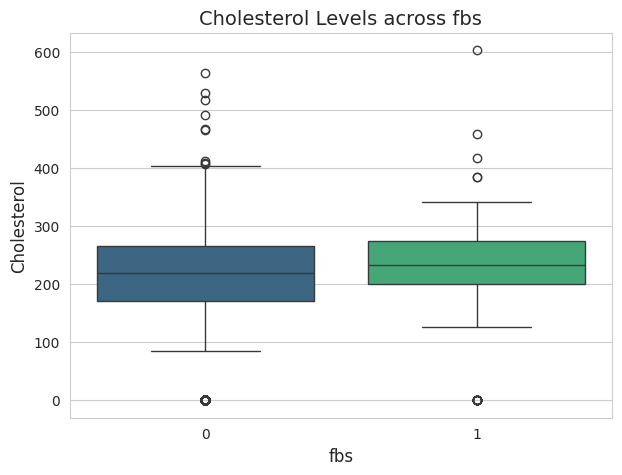

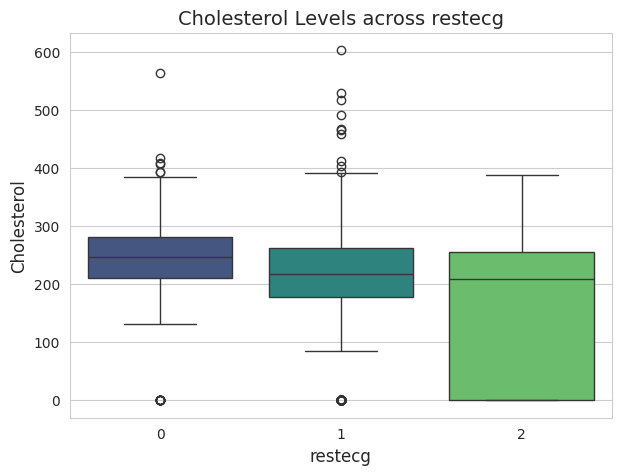

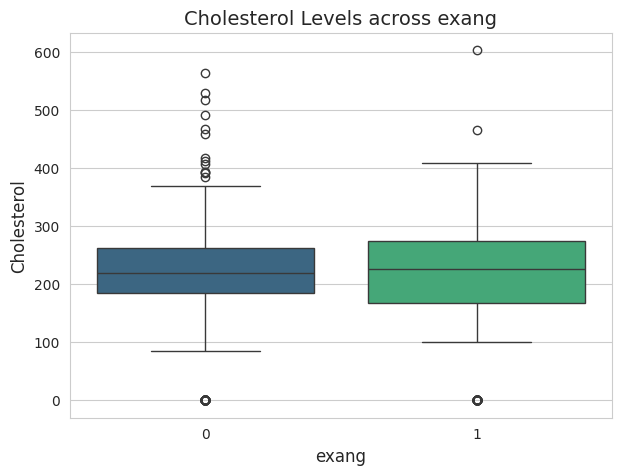

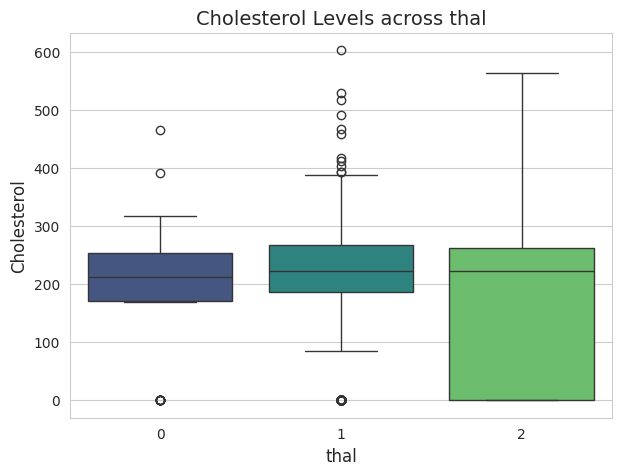

In [ ]:
for var in categorical_vars:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=dataset[var], y=dataset['chol'], palette='viridis')
    plt.title(f'Cholesterol Levels across {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Cholesterol', fontsize=12)
    plt.show()

**2.4 Violin Plots** (Shows the distribution and density of numerical values for each category.)

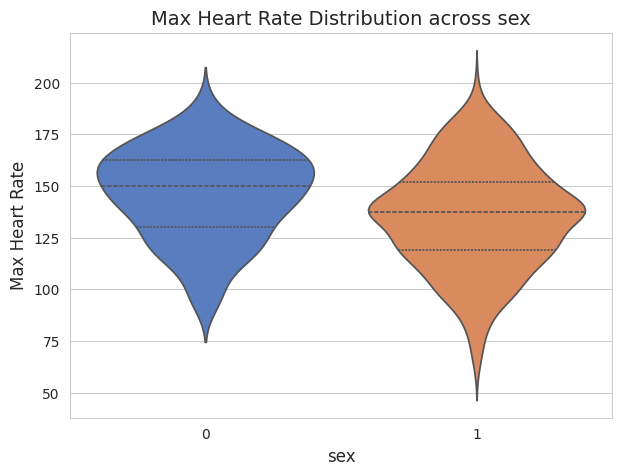

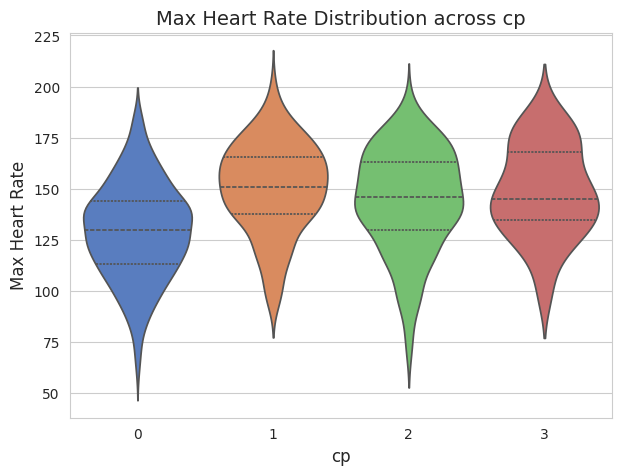

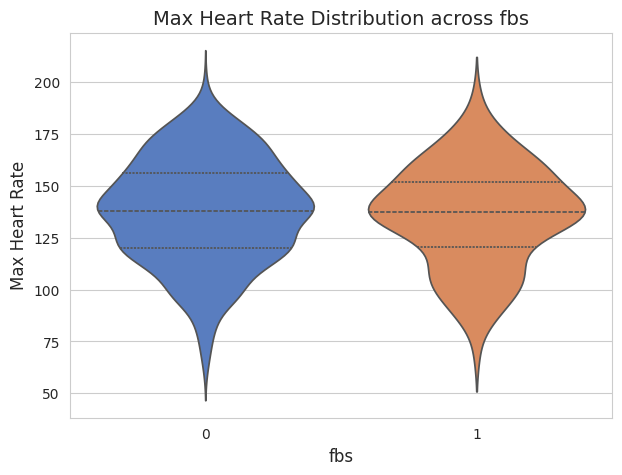

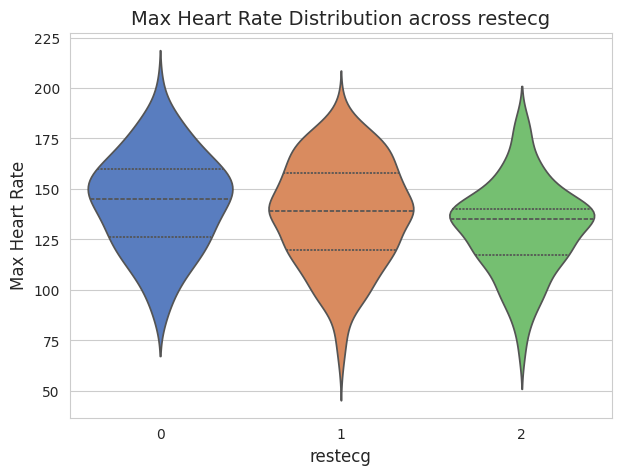

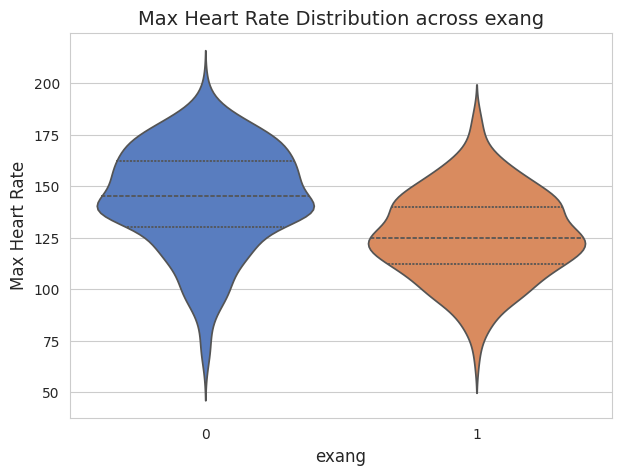

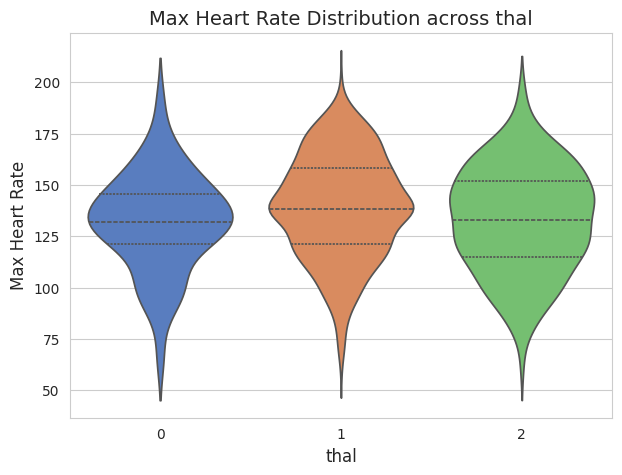

In [ ]:
for var in categorical_vars:
    plt.figure(figsize=(7, 5))
    sns.violinplot(x=dataset[var], y=dataset['thalch'], palette='muted', inner="quartile")
    plt.title(f'Max Heart Rate Distribution across {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Max Heart Rate', fontsize=12)
    plt.show()

**Categorical vs. Categorical**

**2.5 Stacked Bar Charts** (Compares two categorical variables using stacked bars.)

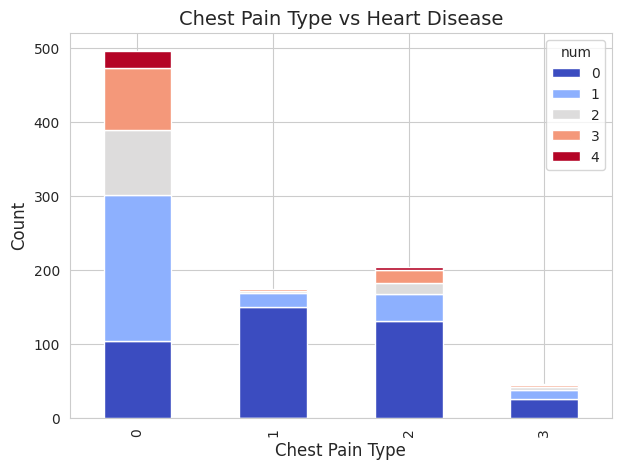

In [ ]:
pd.crosstab(dataset['cp'], dataset['num']).plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(7,5))
plt.title("Chest Pain Type vs Heart Disease", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

**2.6 Categorical Heatmap** (Cramér's V for Association Strength) (Shows relationships between categorical variables.)

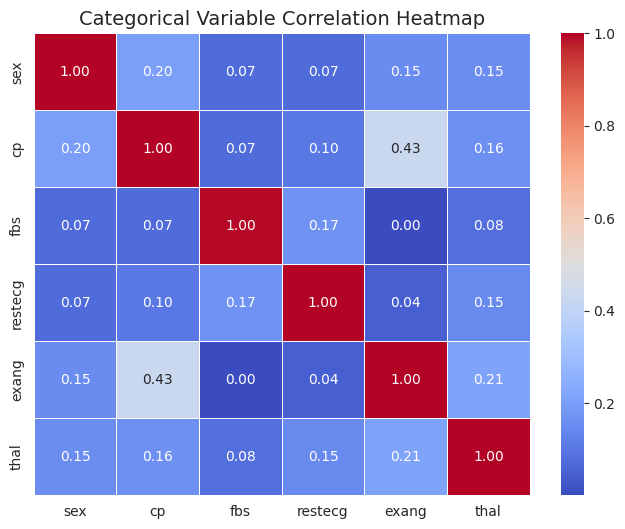

In [ ]:
import scipy.stats as ss

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Calculate correlation for categorical variables
categorical_corr = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for col1 in categorical_vars:
    for col2 in categorical_vars:
        categorical_corr.loc[col1, col2] = cramers_v(dataset[col1], dataset[col2])

categorical_corr = categorical_corr.astype(float)

# Plot categorical heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(categorical_corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Categorical Variable Correlation Heatmap", fontsize=14)
plt.show()

# 3. Multivariate Analysis

**3.1 Pair Plot** (Shows pairwise relationships between multiple features.)

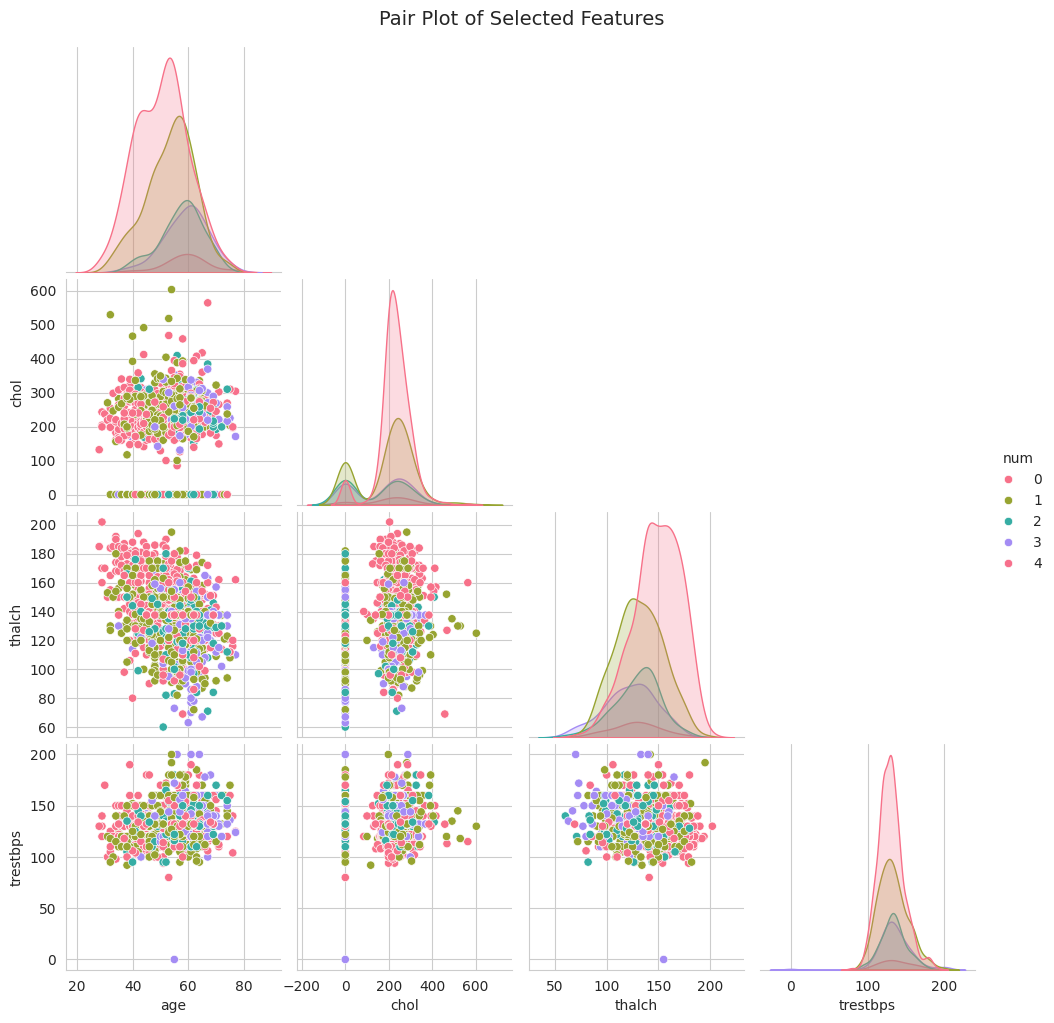

In [ ]:
# Selecting only key features for clarity
selected_vars = ['age', 'chol', 'thalch', 'trestbps', 'num']

# Creating the pair plot with limited variables
sns.pairplot(dataset[selected_vars], hue="num", diag_kind="kde", palette="husl", corner=True)
plt.suptitle("Pair Plot of Selected Features", fontsize=14, y=1.02)
plt.show()

**3.2 3D Scatter Plot** (Visualizes three features in 3D space.)

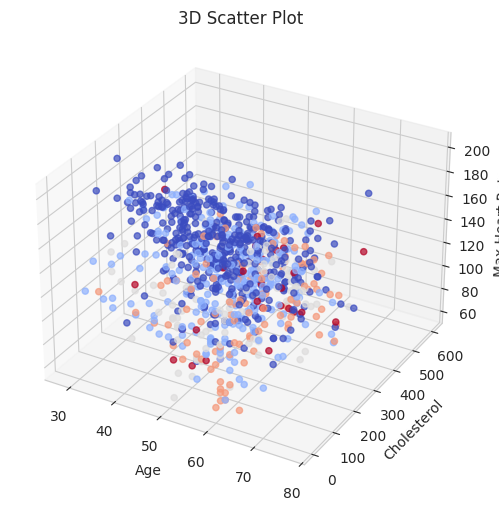

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset['age'], dataset['chol'], dataset['thalch'], c=dataset['num'], cmap='coolwarm', alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Max Heart Rate')
ax.set_title('3D Scatter Plot')

plt.show()

# EDA Summary: Key Observations & Insights
The exploratory data analysis (EDA) revealed key patterns in the heart disease dataset. The most significant factors affecting heart disease risk include age, cholesterol levels, resting blood pressure, and maximum heart rate. Categorical variables like chest pain type and exercise-induced angina also showed strong associations.

While the dataset is mostly balanced, certain features contain outliers, which may require further preprocessing. Missing values were efficiently handled using statistical imputation. These insights guided the feature engineering process and model selection for accurate disease prediction

**Data Transformation: Creating Target Variable**

Create a new column 'target' to simplify the heart disease severity levels

0: No heart disease, 1: Mild heart disease, 2: Severe heart disease



In [ ]:
dataset['target'] = dataset['num'].apply(lambda x: 0 if x == 0 else 1 if x in [1,2]else 2)

In [ ]:
# Drop the original 'num' column as it's no longer needed
dataset = dataset.drop('num',axis=1)

In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
903,56,1,0,130.0,203.0,1,1,98.0,0,1.5,1,0,2,1
300,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,2,2
129,62,0,0,124.0,209.0,0,1,163.0,0,0.0,2,0,1,0
719,74,1,1,145.0,0.0,0,2,123.0,0,1.3,2,0,1,1
769,42,1,2,134.0,240.0,0,1,160.0,0,0.0,1,0,1,0



# **Model Development and Training**
following a thorough understanding and preprocessing of the dataset, we initiate the development and training of various machine learning models, leveraging a range of algorithms to determine the most effective and accurate predictor of the target variable.

**Logistic Regression**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Define the feature dataset (x) and the target variable (y)
x = dataset.drop(dataset.columns[-1], axis=1)  # features
y = dataset[dataset.columns[-1]]  # target variable

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Logistic Regression Performance:
Accuracy: 0.6413043478260869
Precision: 0.6190551680405835
Recall: 0.6413043478260869
F1-score: 0.6039042025828045


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(x_test)

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)



Decision Tree Performance:
Accuracy: 0.6358695652173914
Precision: 0.6279952161212481
Recall: 0.6358695652173914
F1-score: 0.6314229249011858


***SVM***

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("SVM Performance:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


SVM Performance:
Accuracy: 0.9836956521739131
Precision: 0.9836441154422787
Recall: 0.9836956521739131
F1-score: 0.9836087512687532


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(x_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:",f1_rf)


Random Forest Performance:
Accuracy: 0.7119565217391305
Precision: 0.7130497251374313
Recall: 0.7119565217391305
F1-score: 0.7019693429251557


***Neural Network***

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nn = MLPClassifier()
nn.fit(x_train, y_train)
y_pred_nn = nn.predict(x_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')
print("Neural Network Performance:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1-score:",f1_nn)


Neural Network Performance:
Accuracy: 0.9945652173913043
Precision: 0.994633152173913
Recall: 0.9945652173913043
F1-score: 0.9945362504229177


***Gradient Boosting***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)


Gradient Boosting Performance:
Accuracy: 0.7282608695652174
Precision: 0.7264628894147702
Recall: 0.7282608695652174
F1-score: 0.7071918365222597



***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("KNN Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)



KNN Performance:
Accuracy: 0.6304347826086957
Precision: 0.6145326802059496
Recall: 0.6304347826086957
F1-score: 0.6073057819865231


Visualising different Machine Learning Models Performances & Comparison

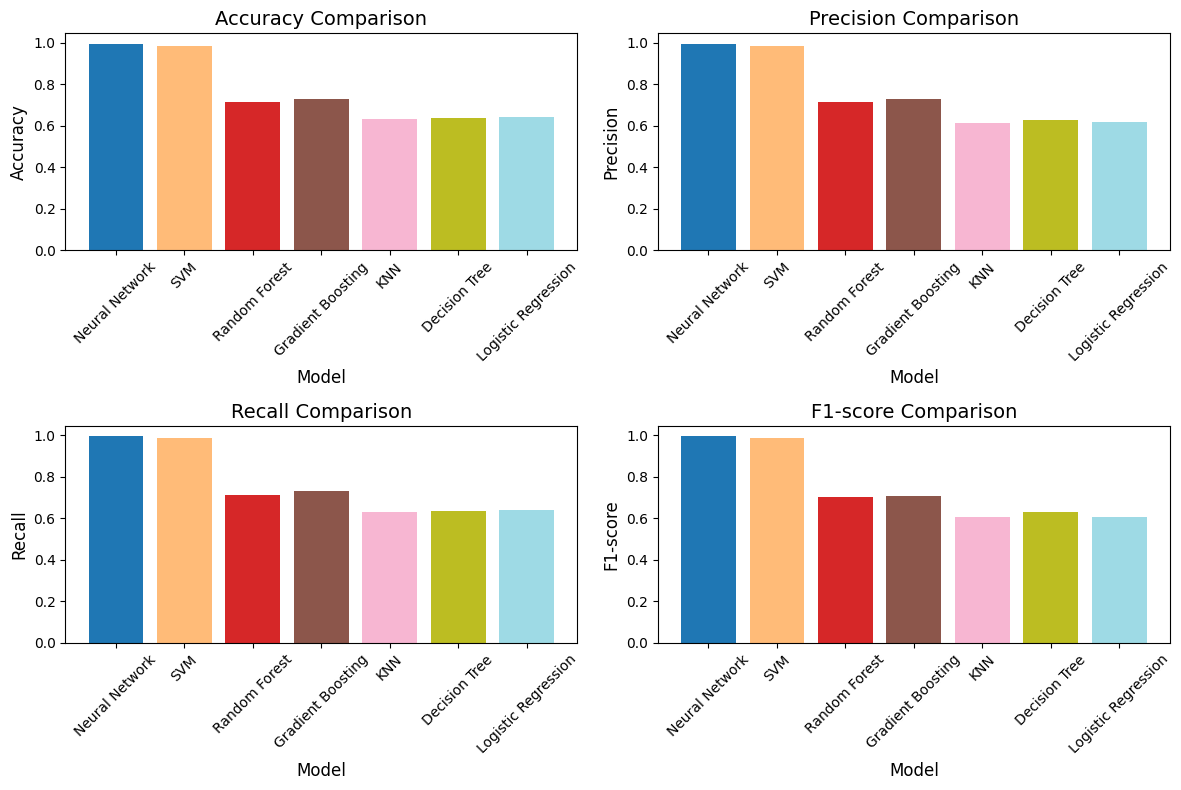

In [ ]:
# Define the data
models = ['Neural Network', 'SVM', 'Random Forest', 'Gradient Boosting', 'KNN', 'Decision Tree', 'Logistic Regression']
accuracy = [0.9946, 0.9837, 0.7120, 0.7283, 0.6304, 0.6359, 0.6413]
precision = [0.9946, 0.9836, 0.7130, 0.7265, 0.6145, 0.6280, 0.6191]
recall = [0.9946, 0.9837, 0.7120, 0.7283, 0.6304, 0.6359, 0.6413]
f1_score = [0.9945, 0.9836, 0.7020, 0.7072, 0.6073, 0.6314, 0.6039]

# Create the charts
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy chart
axs[0, 0].bar(models, accuracy, color=plt.cm.tab20(np.linspace(0, 1, len(models))))
axs[0, 0].set_title('Accuracy Comparison', fontsize=14)
axs[0, 0].set_xlabel('Model', fontsize=12)
axs[0, 0].set_ylabel('Accuracy', fontsize=12)
axs[0, 0].tick_params(axis='x', labelrotation=45)

# Precision chart
axs[0, 1].bar(models, precision, color=plt.cm.tab20(np.linspace(0, 1, len(models))))
axs[0, 1].set_title('Precision Comparison', fontsize=14)
axs[0, 1].set_xlabel('Model', fontsize=12)
axs[0, 1].set_ylabel('Precision', fontsize=12)
axs[0, 1].tick_params(axis='x', labelrotation=45)

# Recall chart
axs[1, 0].bar(models, recall, color=plt.cm.tab20(np.linspace(0, 1, len(models))))
axs[1, 0].set_title('Recall Comparison', fontsize=14)
axs[1, 0].set_xlabel('Model', fontsize=12)
axs[1, 0].set_ylabel('Recall', fontsize=12)
axs[1, 0].tick_params(axis='x', labelrotation=45)

# F1-score chart
axs[1, 1].bar(models, f1_score, color=plt.cm.tab20(np.linspace(0, 1, len(models))))
axs[1, 1].set_title('F1-score Comparison', fontsize=14)
axs[1, 1].set_xlabel('Model', fontsize=12)
axs[1, 1].set_ylabel('F1-score', fontsize=12)
axs[1, 1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

#Machine Learning Model Performance & Comparison

#### **1️⃣ Model Selection & Training**  
- Multiple machine learning models were trained and evaluated to identify the most effective algorithm for heart disease prediction.  
- The dataset was split into training and testing sets, and preprocessing techniques such as feature scaling were applied to improve performance.  

#### **2️⃣ Performance Evaluation & Comparison**  
- Models were assessed based on **accuracy, precision, recall, and F1-score** to ensure a balanced evaluation.  
- Visualization techniques were used to compare model performances and identify the most effective algorithm.  
- Some models performed better than others, highlighting the impact of different learning approaches on classification accuracy.  

#### **3️⃣ Key Observations & Insights**  
- **Neural Networks** demonstrated higher accuracy and recall, making them effective for detecting heart disease cases.  
- **Logistic Regression** performed poorly, indicating that a simple linear model is not well-suited for this dataset.  
- While some models excelled in **recall** (better at identifying actual heart disease cases), others had **higher precision**, reducing false positive predictions.  

#### **4️⃣ Possible Enhancements & Next Steps**  
- **Further Hyperparameter Tuning:** Advanced optimization techniques could refine model performance.  
- **Experimenting with Ensemble Learning:** Combining multiple models, such as **Random Forest or Gradient Boosting**, may improve prediction reliability.  
- **Deep Learning Approaches:** More complex **neural network architectures** could be explored for enhanced pattern recognition.  
- **Feature Expansion:** Incorporating additional medical attributes or domain-specific insights could improve predictive accuracy.  


# **Final Overall Project Summary**
This project aimed to analyze and predict heart disease using machine learning techniques. The Exploratory Data Analysis (EDA) revealed key risk factors, including age, cholesterol levels, resting blood pressure, and exercise-induced angina. Missing values were imputed, and features were scaled to optimize model performance.

Multiple models were trained on the processed dataset, achieving varying accuracies, demonstrating a solid baseline performance. While the models effectively classified heart disease cases, further improvements through hyperparameter tuning, feature engineering, and ensemble methods could enhance predictive power.

Overall, this project provides valuable insights into heart disease prediction, combining statistical analysis with machine learning to assist in early diagnosis and risk assessment.